In [1]:
import time

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

In [2]:
# SPDX-License-Identifier: BSD-3-Clause
# Turn down for faster convergence
t0 = time.time()
train_samples = 5000

# # Load data from https://www.openml.org/d/554
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)


Sparsity with L1 penalty: 77.39%
Test score with L1 penalty: 0.8236
Example run in 12.556 s


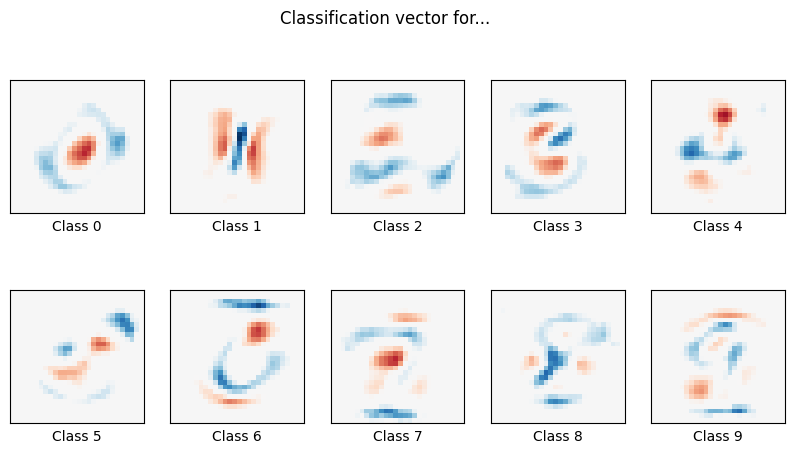

In [3]:
random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_samples, test_size=10000
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Turn up tolerance for faster convergence
clf = LogisticRegression(C=50.0 / train_samples, penalty="l1", solver="saga", tol=0.1)
clf.fit(X_train, y_train)
sparsity = np.mean(clf.coef_ == 0) * 100
score = clf.score(X_test, y_test)
# print('Best C % .4f' % clf.C_)
print("Sparsity with L1 penalty: %.2f%%" % sparsity)
print("Test score with L1 penalty: %.4f" % score)

coef = clf.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(
        coef[i].reshape(28, 28),
        interpolation="nearest",
        cmap=plt.cm.RdBu,
        vmin=-scale,
        vmax=scale,
    )
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel("Class %i" % i)
plt.suptitle("Classification vector for...")

run_time = time.time() - t0
print("Example run in %.3f s" % run_time)
plt.show()

In [4]:
# FFNN from Sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# Normalize the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 2 hidden layers (100 neurons each)
ffnn = MLPClassifier(hidden_layer_sizes=(200, 200), activation='relu', solver='adam', max_iter=50)
ffnn.fit(X_train, y_train)
ffnn.score(X_test, y_test)

0.935

Epoch 1/100 - Loss: 0.0924
Epoch 2/100 - Loss: 0.0826
Epoch 3/100 - Loss: 0.0801
Epoch 4/100 - Loss: 0.0780
Epoch 5/100 - Loss: 0.0760
Epoch 6/100 - Loss: 0.0740
Epoch 7/100 - Loss: 0.0719
Epoch 8/100 - Loss: 0.0697
Epoch 9/100 - Loss: 0.0675
Epoch 10/100 - Loss: 0.0654
Epoch 11/100 - Loss: 0.0635
Epoch 12/100 - Loss: 0.0618
Epoch 13/100 - Loss: 0.0602
Epoch 14/100 - Loss: 0.0587
Epoch 15/100 - Loss: 0.0573
Epoch 16/100 - Loss: 0.0561
Epoch 17/100 - Loss: 0.0549
Epoch 18/100 - Loss: 0.0538
Epoch 19/100 - Loss: 0.0529
Epoch 20/100 - Loss: 0.0520
Epoch 21/100 - Loss: 0.0512
Epoch 22/100 - Loss: 0.0504
Epoch 23/100 - Loss: 0.0497
Epoch 24/100 - Loss: 0.0490
Epoch 25/100 - Loss: 0.0484
Epoch 26/100 - Loss: 0.0478
Epoch 27/100 - Loss: 0.0471
Epoch 28/100 - Loss: 0.0464
Epoch 29/100 - Loss: 0.0458
Epoch 30/100 - Loss: 0.0453
Epoch 31/100 - Loss: 0.0447
Epoch 32/100 - Loss: 0.0442
Epoch 33/100 - Loss: 0.0436
Epoch 34/100 - Loss: 0.0431
Epoch 35/100 - Loss: 0.0426
Epoch 36/100 - Loss: 0.0423
E

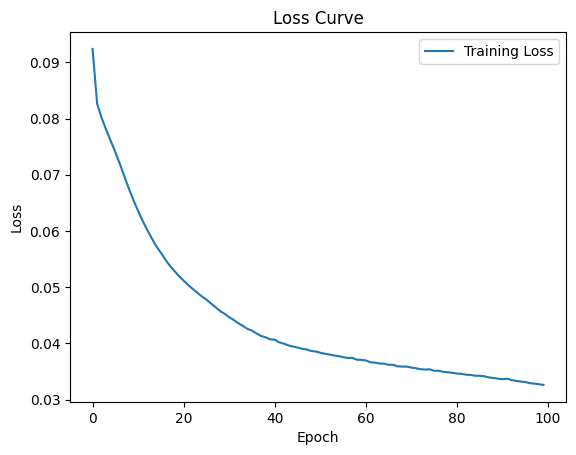

Akurasi pada data uji: 76.27%


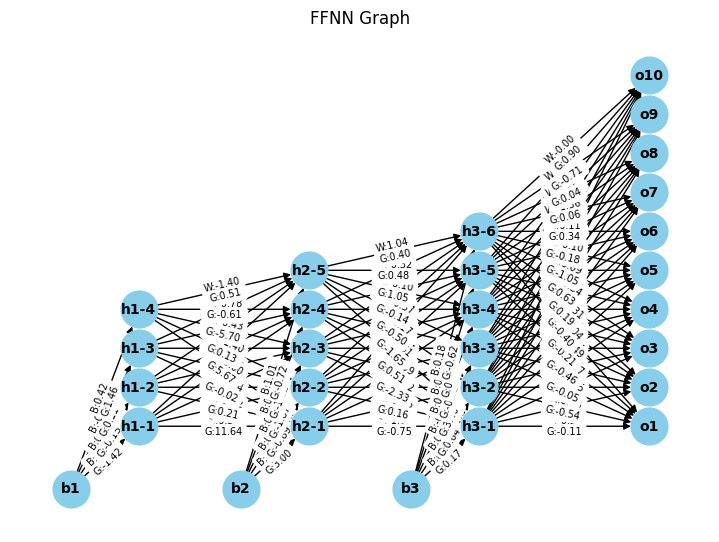

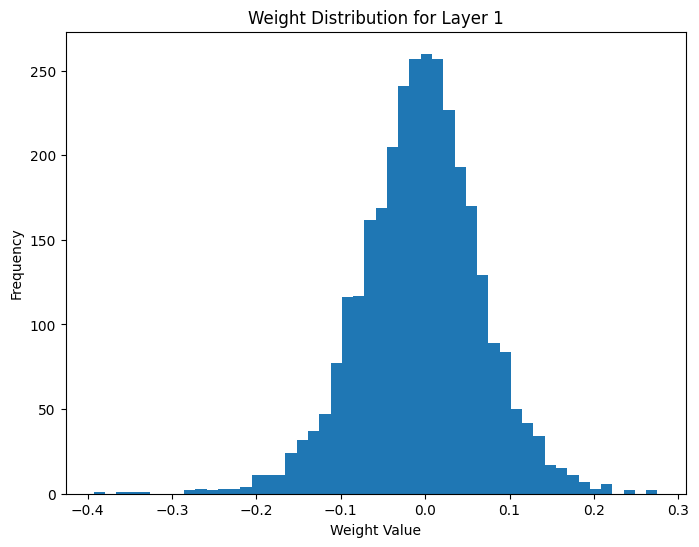

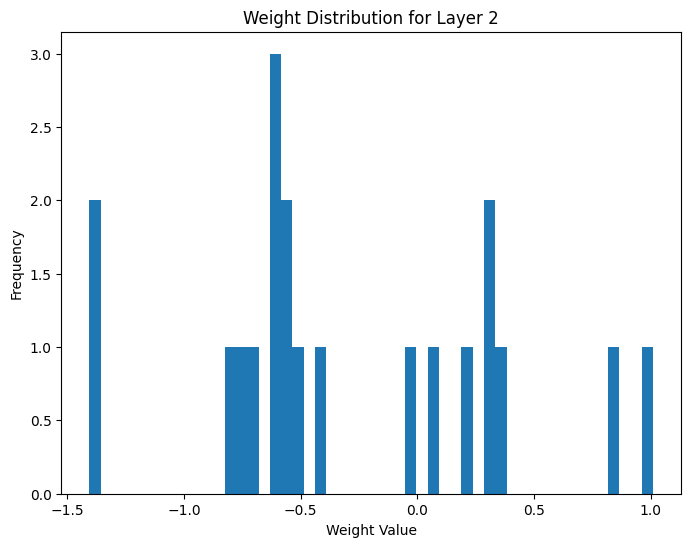

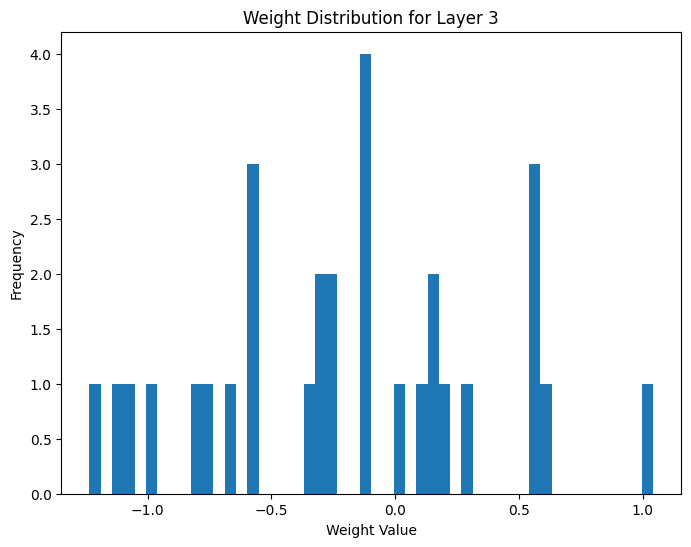

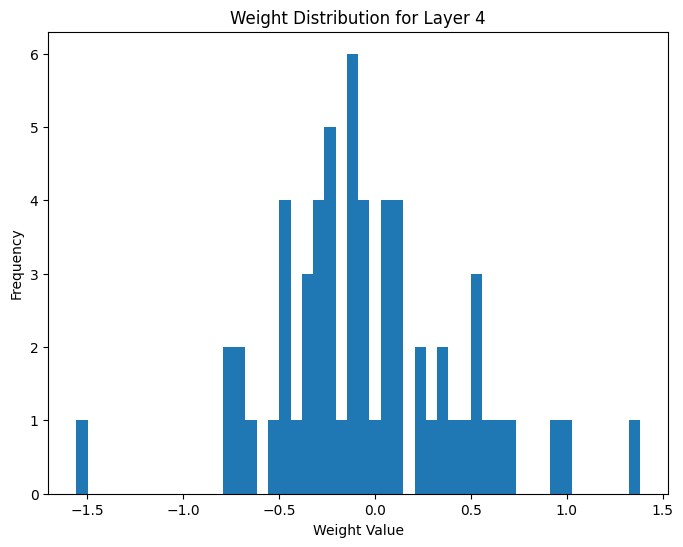

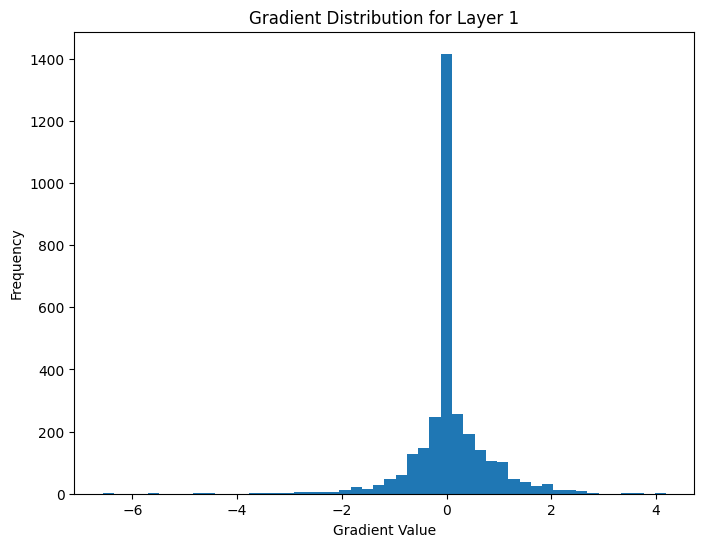

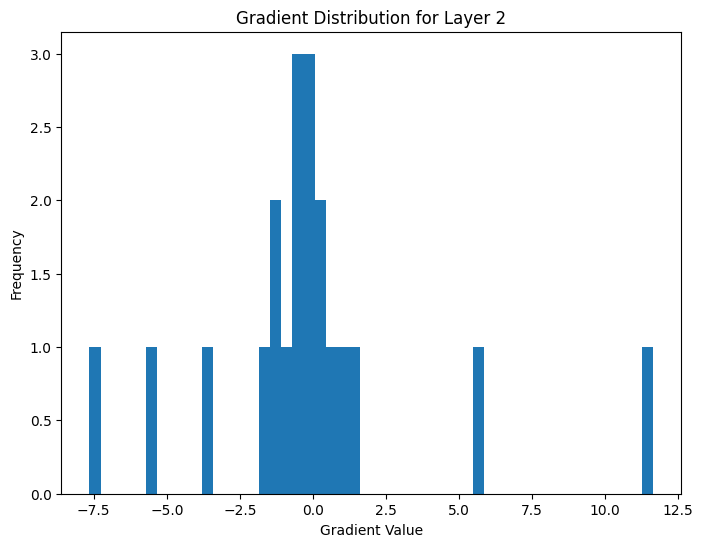

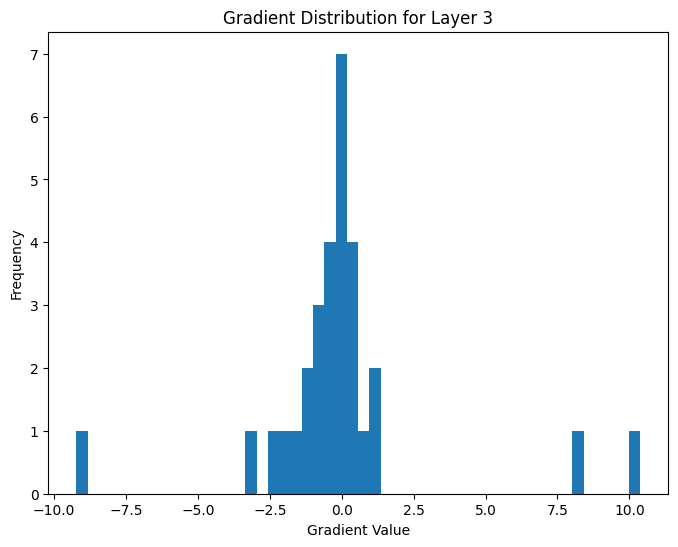

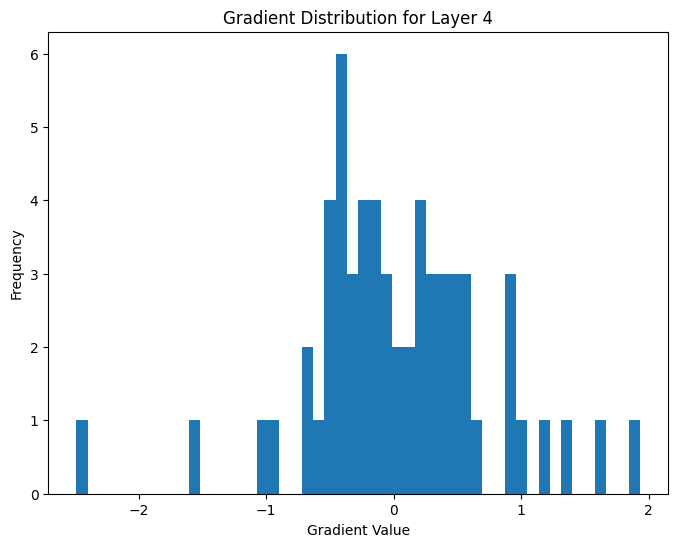

In [12]:
from importlib import reload
import main  # Memastikan file 'main' diimpor
reload(main)  # Memuat ulang file main.py
from main import FFNN
import numpy as np
from sklearn.preprocessing import OneHotEncoder

def main(X_train, X_test, y_train, y_test):
    default_n_layer = 3
    default_neurons = [100, 100, 100]
    default_activation = "swish"
    default_loss = "mse"
    default_weight_method = "xavier"
    default_learning_rate = 0.001
    default_epochs = 100
    default_batch_size = 200
    default_regularization = None
    default_lambda_reg = 0.01
    default_verbose = 1
    default_rms_norm = False

    # Input jumlah layer
    n_layer = input(f"Masukkan jumlah hidden layer ({default_n_layer}): ")
    n_layer = int(n_layer) if n_layer else default_n_layer

    # Input jumlah neuron per layer
    arr_of_layer = [X_train.shape[1]]
    for i in range(n_layer):
        temp = input(f"Masukkan jumlah neuron hidden layer ke-{i+1} ({default_neurons[i] if i < len(default_neurons) else 100}): ")
        temp = int(temp) if temp else (default_neurons[i] if i < len(default_neurons) else 100)
        arr_of_layer.append(temp)
    
    arr_of_layer.append(len(set(y_train)))  # Jumlah neuron di output layer

    # Input activation function
    act_functions = input(f"Masukkan jenis activation function ({default_activation}): ")
    act_functions = act_functions if act_functions else default_activation
    arr_of_act = [act_functions] * (n_layer + 1)

    # Input loss function
    loss_func = input(f"Masukkan jenis loss function ({default_loss}): ")
    loss_func = loss_func if loss_func else default_loss

    # Input weight initialization method
    w_method = input(f"Masukkan jenis inisialisasi weight ({default_weight_method}): ")
    w_method = w_method if w_method else default_weight_method

    # Jika weight_method adalah uniform atau normal, minta parameter tambahan
    if w_method == 'uniform':
        low_bound = input("Masukkan batas bawah untuk uniform distribution (-1): ")
        up_bound = input("Masukkan batas atas untuk uniform distribution (1): ")
        low_bound = float(low_bound) if low_bound else -1
        up_bound = float(up_bound) if up_bound else 1
        mean = None
        variance = None
    elif w_method == 'normal':
        mean = input("Masukkan nilai mean untuk normal distribution (0.0): ")
        variance = input("Masukkan nilai variance untuk normal distribution (0.1): ")
        mean = float(mean) if mean else 0.0
        variance = float(variance) if variance else 0.1
        low_bound = None
        up_bound = None
    else:
        low_bound, up_bound, mean, variance = None, None, None, None

    # Input hyperparameter lainnya
    learning_rate = input(f"Masukkan learning rate ({default_learning_rate}): ")
    learning_rate = float(learning_rate) if learning_rate else default_learning_rate

    epochs = input(f"Masukkan jumlah epoch ({default_epochs}): ")
    epochs = int(epochs) if epochs else default_epochs

    batch_size = input(f"Masukkan ukuran batch ({default_batch_size}): ")
    batch_size = int(batch_size) if batch_size else default_batch_size

    # Input regularization
    reg = input(f"Apakah menggunakan regularization? (l1/l2) (default: {default_regularization}): ")
    reg = reg.lower() if reg else default_regularization

    if reg in ['l1', 'l2']:
        lambda_reg = input(f"Masukkan nilai lambda regularization ({default_lambda_reg}): ")
        lambda_reg = float(lambda_reg) if lambda_reg else default_lambda_reg
    else:
        lambda_reg = None
        reg = None

    # Input verbose
    verbose = input(f"Masukkan verbose (0 = tidak tampil, 1 = tampil progress bar) ({default_verbose}): ")
    verbose = int(verbose) if verbose else default_verbose

    # Input RMS Normalization
    rms_n = input(f"Apakah menggunakan RMS Norm? (y/n) (default: {'y' if default_rms_norm else 'n'}): ")
    rms_n = rms_n.lower() == 'y' if rms_n else default_rms_norm

    # Membuat model FFNN
    model = FFNN(
        layers=arr_of_layer,
        activation_functions=arr_of_act,
        loss_function=loss_func,
        weight_method=w_method,
        seed=42,
        regularization=reg,
        low_bound=low_bound,
        up_bound=up_bound,
        mean=mean,
        variance=variance,
        rms_norm=rms_n,
        lambda_reg=lambda_reg
    )  

    # Melatih model
    model.train(X_train, y_train, epochs=epochs, learning_rate=learning_rate, batch_size=batch_size, verbose=verbose)

    # Evaluasi pada data uji
    activations, _ = model.forward(X_test)
    y_pred = np.argmax(activations[-1], axis=1)
    
    encoder = OneHotEncoder(sparse_output=False)
    y_test_encoded = encoder.fit_transform(y_test.reshape(-1, 1))
    y_true = np.argmax(y_test_encoded, axis=1)

    accuracy = np.mean(y_pred == y_true)
    print("Akurasi pada data uji: %.2f%%" % (accuracy * 100))

    model.plot_model_structure()
    model.plot_weight_distribution()
    model.plot_gradient_distribution()

# Menjalankan fungsi
main(X_train, X_test, y_train, y_test)


In [ ]:
from importlib import reload
import main  # Memastikan file 'main' diimpor
reload(main)  # Memuat ulang file main.py
from main import FFNN

ffnn_model = FFNN(
    layers=[X_train.shape[1], 100, 100, 100, 100, 100, len(set(y_train))],  # Input, hidden 1, hidden 2, output
    activation_functions=['swish', 'swish', 'swish', 'swish', 'swish', 'swish'],
    loss_function='mse',
    weight_method='xavier',
    seed=42,
    regularization=None,
    rms_norm=False
)
a = ffnn_model.train(X_train, y_train, X_test, y_test, epochs=100, learning_rate=0.001, batch_size=200)
print(a)

TypeError: FFNN.train() got multiple values for argument 'epochs'

Bawah ngetes bonus

In [ ]:
# L1 regularisation (Lasso)
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha=50,max_iter=100,tol=0.1)
lasso_reg.fit(X_train,y_train)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [ ]:
lasso_reg.score(X_test,y_test)

-0.0002375437494799293

In [ ]:
# L2 regularisation (Ridge)
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=50, max_iter=100, tol=0.1)
ridge_reg.fit(X_train,y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [ ]:
ridge_reg.score(X_test,y_test)

-1.9293922899402767

In [ ]:
from utils import RMSNorm

# Contoh penggunaan RMSNorm
x = np.array([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])  # Contoh input 2D
rmsnorm = RMSNorm(dim=x.shape[1])  # Inisialisasi dengan dimensi yang sesuai (3 fitur)
output = rmsnorm(x)  # Terapkan RMSNorm
print(output)


[[0.46291005 0.9258201  1.38873015]
 [0.78954203 0.98692754 1.18431305]]
